# <center> Analyse de la concentration de CO2 <center>

In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy import interpolate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"    
# ‘all’|’last’|’last_expr’|’none’
#https://jupyter-console.readthedocs.io/en/4.0.1/config_options.html
pd.options.display.max_rows = 15

Nous récupérons les données les plus récentes sur le site en pointant sur un fichier au format .csv, si cette récupération est possible nous enregistrons une copie de ce fichier. Si pour une raison quelconque nous n'arrivons pas à faire ce téléchargement, nous travaillons sur les dernières données téléchargé.

In [61]:
try:
    raw_data = pd.read_csv("https://scrippsco2.ucsd.edu/assets/data/atmospheric/stations/"
                           "in_situ_co2/monthly/monthly_in_situ_co2_mlo.csv",skiprows=56)
except OSError as err:
    print("Erreur lors du téléchargement : {0}".format(err))
    print("Nous téléchargeons les dernières données enregistrer sur notre PC")
    raw_data = pd.read_csv("monthly_in_situ_co2_mlo")
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise
else:
    raw_data.to_csv('monthly_in_situ_co2_mlo',index=True)

print(raw_data.shape)
raw_data

(756, 10)


Excel                 [ppm]      [ppm]         [ppm]  \
0    1958    1     21200   1958.0411    -99.99      -99.99       -99.99   
1    1958    2     21231   1958.1260    -99.99      -99.99       -99.99   
2    1958    3     21259   1958.2027    315.70      314.44       316.19   
3    1958    4     21290   1958.2877    317.45      315.16       317.30   
4    1958    5     21320   1958.3699    317.51      314.71       317.86   
5    1958    6     21351   1958.4548    -99.99      -99.99       317.24   
6    1958    7     21381   1958.5370    315.86      315.19       315.86   
..    ...  ...       ...         ...       ...         ...          ...   
749  2020    6     43997   2020.4563    -99.99      -99.99       -99.99   
750  2020    7     44027   2020.5383    -99.99      -99.99       -99.99   
751  2020    8     44058   2020.6230    -99.99      -99.99       -99.99   
752  2020    9     44089   2020.7077    -99.99      -99.99       -99.99   
753  2020   10     44119   2020.7896    -99.99      -99.99       -99.99   
754  2020   11     44150   2020.8743    -99.99      -99.99       -99.99   
755  2020   12     44180   2020.9563    -99.99      -99.99       -99.99   

         [ppm]         [ppm]      [ppm].1  
0       -99.99        -99.99       -99.99  
1       -99.99        -99.99       -99.99  
2       314.91        315.70       314.44  
3       314.99        317.45       315.16  
4       315.06        317.51       314.71  
5       315.14        317.24       315.14  
6       315.22        315.86       315.19  
..         ...           ...          ...  
749     -99.99        -99.99       -99.99  
750     -99.99        -99.99       -99.99  
751     -99.99        -99.99       -99.99  
752     -99.99        -99.99       -99.99  
753     -99.99        -99.99       -99.99  
754     -99.99        -99.99       -99.99  
755     -99.99        -99.99       -99.99  

[756 rows x 10 columns]

In [1]:
%%html
<iframe width='100%' height='350'
src="https://scrippsco2.ucsd.edu/">
</iframe>

Nous voyons que les noms des colonnes ne sont pas très représentatives, nous modifions  les noms des colonnes. Les données vide sont représentés par la valeur -99.99, nous remplaçons cette valeur par une valeur plus adéquate NaN dans une autre DataFrame

In [62]:
raw_data_1 = raw_data.copy()
print(raw_data.columns)
raw_data_1.columns = ['Yr','Mn','Date 1','Date 2','s1','s2','s3','s4','s5','s6']
raw_data_1

Index(['    ', '   ', '   Excel', '          ', '   [ppm]', '    [ppm] ',
       '      [ppm]', '    [ppm]', '       [ppm]', '    [ppm].1'],
      dtype='object')


Yr  Mn  Date 1     Date 2      s1      s2      s3      s4      s5  \
0    1958   1   21200  1958.0411  -99.99  -99.99  -99.99  -99.99  -99.99   
1    1958   2   21231  1958.1260  -99.99  -99.99  -99.99  -99.99  -99.99   
2    1958   3   21259  1958.2027  315.70  314.44  316.19  314.91  315.70   
3    1958   4   21290  1958.2877  317.45  315.16  317.30  314.99  317.45   
4    1958   5   21320  1958.3699  317.51  314.71  317.86  315.06  317.51   
5    1958   6   21351  1958.4548  -99.99  -99.99  317.24  315.14  317.24   
6    1958   7   21381  1958.5370  315.86  315.19  315.86  315.22  315.86   
..    ...  ..     ...        ...     ...     ...     ...     ...     ...   
749  2020   6   43997  2020.4563  -99.99  -99.99  -99.99  -99.99  -99.99   
750  2020   7   44027  2020.5383  -99.99  -99.99  -99.99  -99.99  -99.99   
751  2020   8   44058  2020.6230  -99.99  -99.99  -99.99  -99.99  -99.99   
752  2020   9   44089  2020.7077  -99.99  -99.99  -99.99  -99.99  -99.99   
753  2020  10   44119  2020.7896  -99.99  -99.99  -99.99  -99.99  -99.99   
754  2020  11   44150  2020.8743  -99.99  -99.99  -99.99  -99.99  -99.99   
755  2020  12   44180  2020.9563  -99.99  -99.99  -99.99  -99.99  -99.99   

         s6  
0    -99.99  
1    -99.99  
2    314.44  
3    315.16  
4    314.71  
5    315.14  
6    315.19  
..      ...  
749  -99.99  
750  -99.99  
751  -99.99  
752  -99.99  
753  -99.99  
754  -99.99  
755  -99.99  

[756 rows x 10 columns]

On supprime les lignes du début et de fin de la DataFrame qui n'ont pas de valeurs

In [63]:
data = raw_data_1.copy()
date = datetime.date.today()

data = data.drop(data[(data.Yr == date.year) & (data.Mn > date.month)].index)
data = data.replace(-99.99,np.NaN);
d = data[(data.Yr == date.year)].index
i,k = d[0], d[-1]

while k>=i:
    if data.loc[k].isnull().any():
        data = data.drop(k)
    else:
        break
    k = k - 1
    
annee, mois  = data.Yr[0], data.Mn[0]
d = data[(data.Yr == annee)].index
i,k = d[0], d[-1]

while i<=k:
    if data.loc[i].isnull().any():
        data = data.drop(i)
    else:
        break
    i = i + 1
InteractiveShell.ast_node_interactivity = "all"     
data.head(6)
data.tail(6)
InteractiveShell.ast_node_interactivity = "last_expr"   

On visualise les colonnes dont au moins une donnée est manquante.

In [64]:
#data[data.isnull().any(columns = 's1')]
data.isnull().any()

Yr        False
Mn        False
Date 1    False
Date 2    False
s1         True
s2         True
s3        False
s4        False
s5        False
s6        False
dtype: bool

La colonne s5 represente la concentration en CO2, aucune de ces données sont manquantes. On ajoute un index 'périod' à la DataFrame, cet index représente la période de mesure. Cette date est mise dans au format compréhensible par pandas. On visualise toutes les lignes qui seront supprimées.

In [65]:
df = data.copy()                                 # data.dropna().copy()
df = df.reset_index().copy()
period = [datetime.date(y,m,1) for y,m in zip(df['Yr'],df['Mn'])]
period = pd.Series(period,name = 'period')
df = pd.concat([df,period],axis=1)
df = df.set_index('period') 
df.head()


index    Yr  Mn  Date 1     Date 2      s1      s2      s3  \
period                                                                   
1958-03-01      2  1958   3   21259  1958.2027  315.70  314.44  316.19   
1958-04-01      3  1958   4   21290  1958.2877  317.45  315.16  317.30   
1958-05-01      4  1958   5   21320  1958.3699  317.51  314.71  317.86   
1958-06-01      5  1958   6   21351  1958.4548     NaN     NaN  317.24   
1958-07-01      6  1958   7   21381  1958.5370  315.86  315.19  315.86   

                s4      s5      s6  
period                              
1958-03-01  314.91  315.70  314.44  
1958-04-01  314.99  317.45  315.16  
1958-05-01  315.06  317.51  314.71  
1958-06-01  315.14  317.24  315.14  
1958-07-01  315.22  315.86  315.19

Représentation graphique de la concentration  de CO2 de 1958 à nos jours

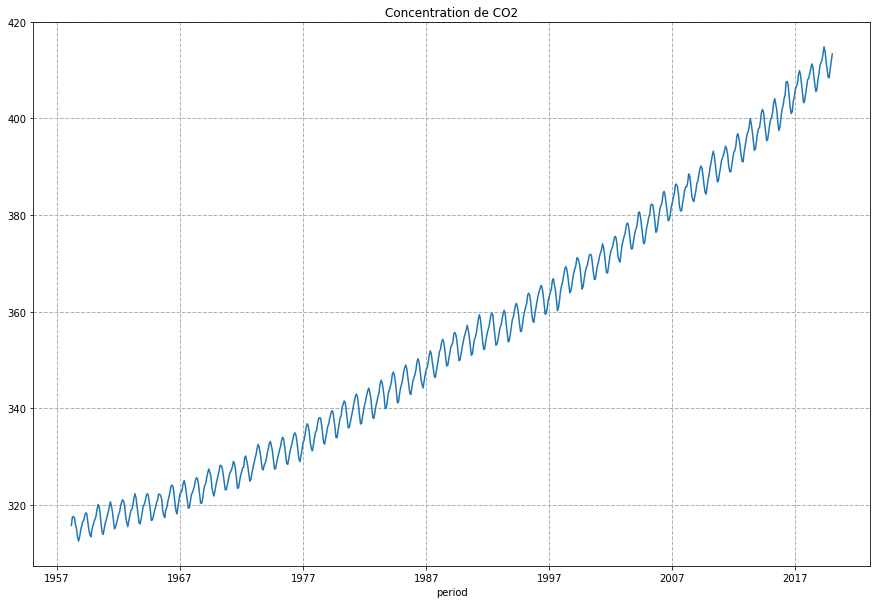

In [66]:
df['s5'].plot(figsize=(15, 10),title = 'Concentration de CO2').grid(linestyle='--', linewidth=1);

Nous allons approximé la concentration de CO2 avec une droite $a*x+b$, puis faire la différence pour 
n'obtenir que les variations de la concentration de CO2.

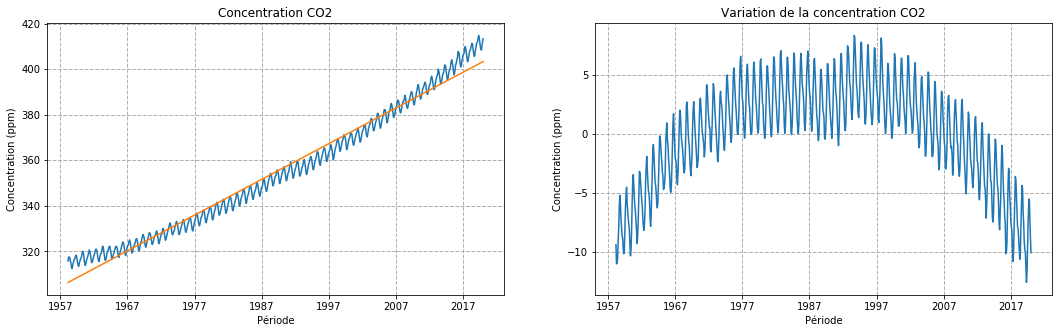

In [67]:
from scipy import stats

a, b, r_value, p_value, std_err = stats.linregress(df['Date 2'], df['s5'])
def predict(x):
    return a*x+b

data_lineaire = df.copy()
data_lineaire['reg_lineaire'] = predict(data_lineaire['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)
#plot(figsize=(8, 5))  .plot(figsize=(15, 10), grid=True).grid(linestyle='--', linewidth=1);

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_lineaire['s5'])
#data1['s1'].plot()
ax1.plot(data_lineaire['reg_lineaire']) 
data_lineaire['co2'] = data_lineaire['reg_lineaire']-data_lineaire['s5']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_lineaire['co2']); 

Le résultat n'est pas satisfaisant ...
Nous pouvons faire une optimisation avec une fonction de la forme $a*(x-b)^2+c$

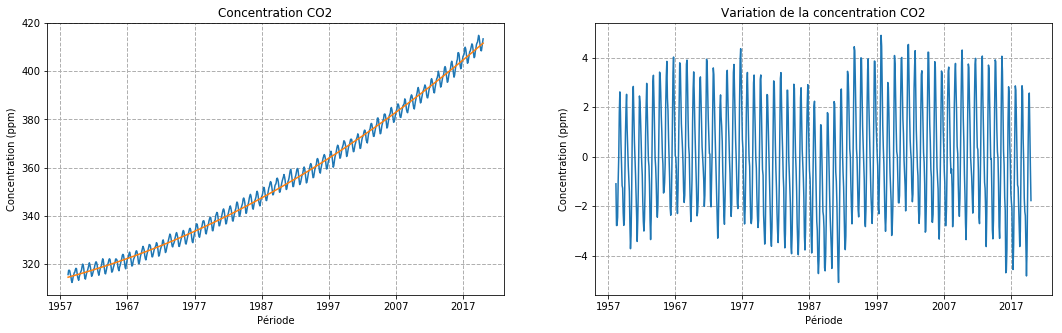

In [68]:
from scipy.optimize import curve_fit

def func_cube(x,a,b,c):
    return a*(x-b)**(2)+c

data_cube = df.copy()
popt, pcov = curve_fit(func_cube,data_cube['Date 2'],data_cube['s5'])

def fcube(x):
    return popt[0]*(x- popt[1])**(2)+popt[2]

data_cube['reg_cube'] = fcube(data_cube['Date 2'])

fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(data_cube['s5'])
ax1.plot(data_cube['reg_cube']) 
data_cube['co2'] = data_cube['reg_cube']-data_cube['s5']
ax2.set(title = 'Variation de la concentration CO2',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(data_cube['co2']); 

Nous recherchons l'oscillation lente et rapide, pour cela nous allons opéré en 2 étapes :
- Recherche de ces deux fréquences par FFT. 
- Nous affinons l'estimation de ces fréquences à l'aide d'une  approximation sinusoïdale (fréquence, amplitude, moyenne et phase) par les moindres carrés ordinaires.

Nous considérons pour l'échantillonnage des données un pas constant, correspond à un intervalle de 1 mois  $Te = \frac {1}{12}$. Cet échantillonnage avec le nombre de point de mesure nous donne un échantillonnage en fréquence, ce pas est $\frac {1} {(N*Te)} = 0.016 Hz$ 


Utilisation de la fonction np.fft.fft pour transposer le signal temporel en signal fréquentiel à l’aide de la transformée de Fourier rapide. Le résultat $co2_fft$ est un tableau de nombres complexes. La densité spectrale de puissance est calculée à l’aide de l'estimateur appelé le périodogramme $ \hat{S}_{s5} = \frac {T_e}{N}|co2\_ fft|^2 $  . Les fréquences sont ensuite calculées à l’aide de la fonction np.fft.fftfreq.

Pas d'echantillonnage en fréquence : 0.016150740242261104


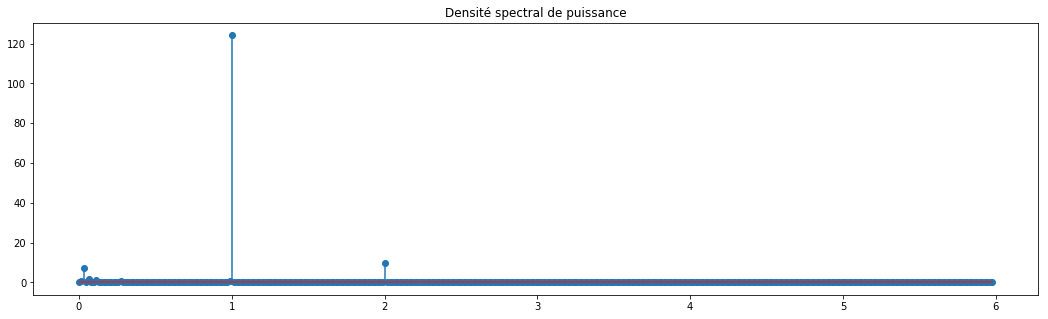

In [69]:
co2 = data_cube.co2 - data_cube.co2.mean()
co2_fft = np.fft.fft(co2)              # calcul de la transformee de Fourier et des frequences

n = co2.size
dt = 1/12
pds_co2 = (dt/n) * np.abs(co2_fft)**2  # densité spectral de puissance
freq = np.fft.fftfreq(n, d=dt)       # fréquences associées

f1 = 1/(n*dt)
print(f'Pas d\'echantillonnage en fréquence : {f1}')

freq = freq[:int(n/2)]
pds_co2 = pds_co2[:int(n/2)]
plt.figure(figsize=(18,5))
plt.title("Densité spectral de puissance")
plt.stem(freq, pds_co2);

Finalement, seules les 'moitiés droites' des tableaux sont conservées car les gauches contiennent les fréquences négatives.

In [70]:
indide_f = np.where(pds_s5 > 5)
f_lente = indide_f[0][0] * f1
indide_f = np.where(pds_s5 > 20)
f_rapide = indide_f[0][-1] * f1
                    
print(f' Estimation de la frequence lente : {f_lente} \n Esitmation de la fréquence rapide : {f_rapide}')

 Estimation de la frequence lente : 0.03230148048452221 
 Esitmation de la fréquence rapide : 1.0013458950201883


In [71]:
def my_sin(x, f, amplitude, phase, offset):
    return np.sin(x * f * 2 * np.pi + phase) * amplitude + offset

# Estimation pour la variation lente
f0 = f_lente   
ampl0= 1
phase0 = 0
offset0 = 0

p0 = [f0,ampl0,phase0,offset0]
x = np.array(data_cube['Date 2'])
popt_l, pcov_l = curve_fit(my_sin, x , s5, p0 = p0)
print(popt_l)
ylent = my_sin(x,popt_l[0],popt_l[1],popt_l[2],popt_l[3])
fl = p0[0]

# Estimation pour la variation rapide
f0 = f_rapide  
ampl0= 3.5
p0 = [f0,ampl0,phase0,offset0]
popt_r, pcov_r = curve_fit(my_sin, x , s5, p0 = p0)
print(popt_r)
yrapide = my_sin(x,popt_r[0],popt_r[1],popt_r[2],popt_r[3])  
fr = p0[0]

[ 2.94262259e-02 -7.52502508e-01  3.62279222e+01 -6.65764876e-02]
[1.00045982 2.84665915 3.31165223 0.00948579]


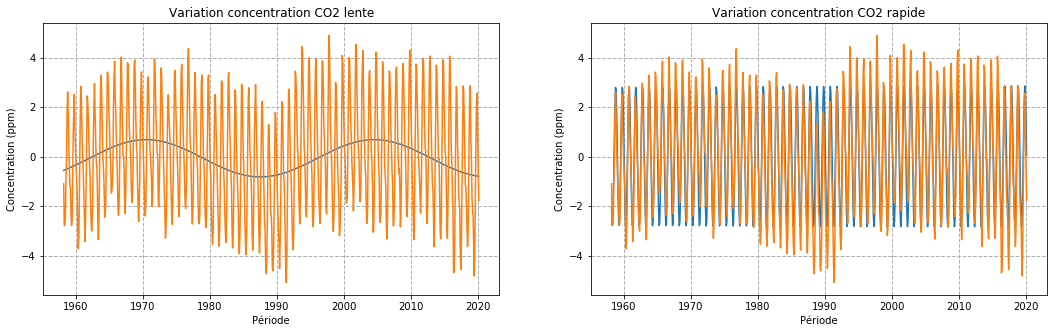

In [72]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Variation concentration CO2 lente',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(x,ylent,x,s5);
ax2.set(title = 'Variation concentration CO2 rapide',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(x,yrapide,x,s5);

0.7829981215405544

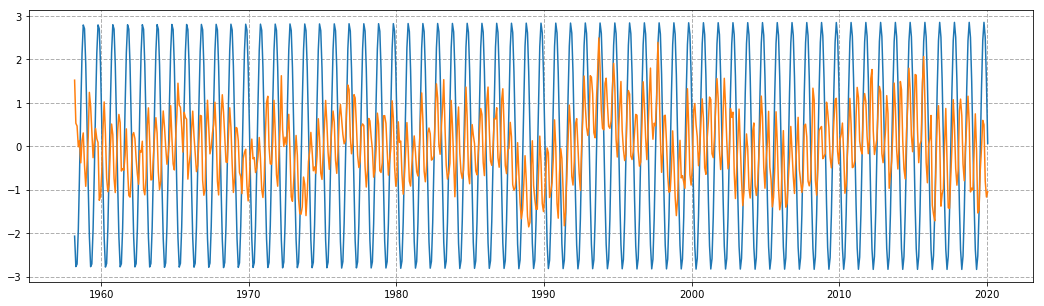

In [73]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(111)
ax1.grid(linestyle='--', linewidth=1)
ax1.plot(x,yrapide,x,s5-ylent-yrapide);
bruit  = (s5-ylent-yrapide).describe()
bruit['std']

In [74]:
print(f' Période lente {1/fl}\n Période rapide {1/fr}')

 Période lente 30.958333333333332
 Période rapide 0.9986559139784947


Nous avons pour la variation lente une fréquence de 0.0294 Hz et pour la variation rapide de 1.0004 Hz. Sachant que 1 Hz 
représente 1 an, nous avons un peu plus d'un an pour la variation rapide, et pour la variation lente une période d'environ 31 ans.

In [75]:
df1 = pd.crosstab(df['Yr'],df['Mn'],values=df['s5'],aggfunc=pd.Series)
df1.head()

Mn        1       2       3       4       5       6       7       8       9   \
Yr                                                                             
1958     NaN     NaN  315.70  317.45  317.51  317.24  315.86  314.93  313.21   
1959  315.58  316.49  316.65  317.72  318.29  318.15  316.54  314.80  313.84   
1960  316.43  316.98  317.58  319.03  320.04  319.59  318.18  315.90  314.17   
1961  316.89  317.70  318.54  319.48  320.58  319.77  318.57  316.79  314.99   
1962  317.94  318.55  319.68  320.57  321.02  320.62  319.61  317.40  316.25   

Mn        10      11      12  
Yr                            
1958  312.44  313.33  314.67  
1959  313.33  314.81  315.58  
1960  313.83  315.00  316.19  
1961  315.31  316.10  317.01  
1962  315.42  316.69  317.70

In [76]:
m = df['Date 2'] - df['Yr']
df2 = pd.crosstab(df['Yr'],df['Mn'],values= m,aggfunc=pd.Series)
df2.head()

Mn        1       2       3       4       5       6       7       8       9   \
Yr                                                                             
1958     NaN     NaN  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1959  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1960  0.0410  0.1257  0.2049  0.2896  0.3716  0.4563  0.5383  0.6230  0.7077   
1961  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   
1962  0.0411  0.1260  0.2027  0.2877  0.3699  0.4548  0.5370  0.6219  0.7068   

Mn        10      11      12  
Yr                            
1958  0.7890  0.8740  0.9562  
1959  0.7890  0.8740  0.9562  
1960  0.7896  0.8743  0.9563  
1961  0.7890  0.8740  0.9562  
1962  0.7890  0.8740  0.9562

On observe pour certaine année un pas différent à partir du mois de février cela est du aux années bissextiles. Dans l'intervalle d'extrapolation, nous avons l'année 2020 et 2024 en année bissextile.

Nous créons une nouvelle DataFrame pour l'interpolation, elle ne contient que les colonnes nécessaire à l'extrapolation.

In [77]:
#df_inter = df[['Yr','Mn','Date 2','s5']]
an_b = df2.loc[1960, : ]
an_n = df2.loc[1961, : ]
year, mois = df[-1:]['Yr'].values, df[-1:]['Mn'].values
#for val in per1: 
#    print(val.date()) 
df[-1:].index
df[-1:]

index    Yr  Mn  Date 1    Date 2      s1      s2      s3      s4  \
period                                                                          
2020-01-01    744  2020   1   43845  2020.041  413.37  413.33  413.11  413.05   

                s5      s6  
period                      
2020-01-01  413.37  413.33

In [78]:
# Année de fin d'extrapolation 
year_f = 2025
ymj_fin = datetime.date(2025, 12, 1)

ymj = df[-1:].index[0].isoformat() 
per1 = pd.date_range(start = ymj,end =ymj_fin, freq=pd.DateOffset(months=1))
period = []
[period.append(datetime.date(i.year,i.month,i.day)) for i in per1]
Yr = pd.Series([q.year for q in per1],index = period )
Mn = pd.Series([q.month for q in per1],index = period)
    
s = []         # oblication d'initial
[s.extend(list(an_n)) if i%4!=0 else s.extend(list(an_b))  for i in np.arange(ymj_fin.year- year[0]+1)]
Data2 = pd.Series(s,index = period)
df_inter = pd.DataFrame({'Yr' : Yr,'Mn' : Mn,'Date 2' : Data2 + Yr})
df_inter.drop(df_inter.index[0],inplace = True)
df_inter.head()

Date 2  Mn    Yr
2020-02-01  2020.1257   2  2020
2020-03-01  2020.2049   3  2020
2020-04-01  2020.2896   4  2020
2020-05-01  2020.3716   5  2020
2020-06-01  2020.4563   6  2020

In [95]:
ylent_inter = my_sin(df_inter['Date 2'],popt_l[0],popt_l[1],popt_l[2],popt_l[3])
yrapide_inter = my_sin(df_inter['Date 2'],popt_r[0],popt_r[1],popt_r[2],popt_r[3]) 

mu, sigma = 0, (bruit['std'])**2 
# creating a noise
noise = np.random.normal(mu, sigma, len(df_inter['Date 2']))
evolution = fcube(df_inter['Date 2'])

df_inter['evolution'] = evolution
df_inter['s5_lent'] = ylent_inter
df_inter['s5_rapide'] = yrapide_inter
df_inter['noise'] = noise
df_inter['s5_inter'] =  df_inter.s5_lent - df_inter.s5_rapide + df_inter.noise+df_inter.evolution
df_inter.head()

Date 2  Mn    Yr   evolution   s5_lent  s5_rapide     noise  \
2020-02-01  2020.1257   2  2020  411.797771 -0.796055  -1.387941 -0.233891   
2020-03-01  2020.2049   3  2020  411.985952 -0.798681  -2.402639  0.244393   
2020-04-01  2020.2896   4  2020  412.187381 -0.801317  -2.836106  0.412678   
2020-05-01  2020.3716   5  2020  412.382567 -0.803696  -2.504793  0.291089   
2020-06-01  2020.4563   6  2020  412.584363 -0.805976  -1.479139  1.090857   

              s5_inter  
2020-02-01  412.155766  
2020-03-01  413.834302  
2020-04-01  414.634848  
2020-05-01  414.374753  
2020-06-01  414.348383

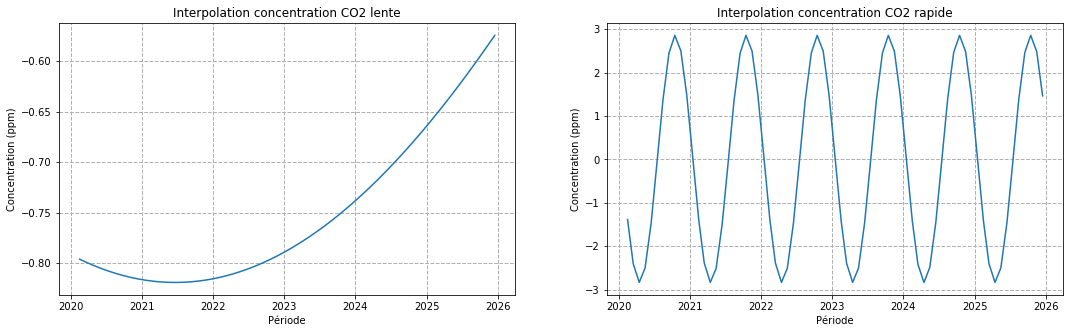

In [96]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.grid(linestyle='--', linewidth=1)
ax2.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Interpolation concentration CO2 lente',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(df_inter['Date 2'],df_inter.s5_lent);
ax2.set(title = 'Interpolation concentration CO2 rapide',xlabel='Période',ylabel='Concentration (ppm)')
ax2.plot(df_inter['Date 2'],df_inter.s5_rapide);

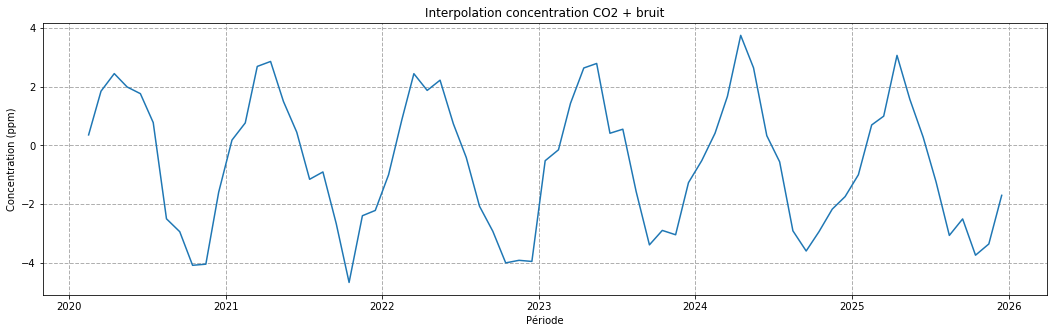

In [97]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(111)
ax1.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Interpolation concentration CO2 + bruit',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(df_inter['Date 2'],df_inter.s5_lent - df_inter.s5_rapide + df_inter.noise);

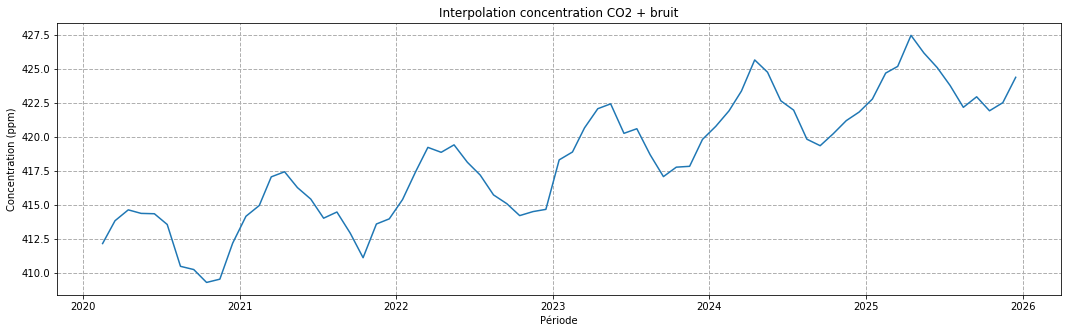

In [98]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(111)
ax1.grid(linestyle='--', linewidth=1)

ax1.set(title = 'Interpolation concentration CO2 + bruit',xlabel='Période',ylabel='Concentration (ppm)')
ax1.plot(df_inter['Date 2'],df_inter.s5_lent - df_inter.s5_rapide + df_inter.noise+df_inter.evolution);

In [99]:
dfb = pd.concat([df, df_inter])

In [100]:
co2 = list(df['s5'])
co2.extend(list(df_inter['s5_inter']))
dfb.index

Index([1958-03-01, 1958-04-01, 1958-05-01, 1958-06-01, 1958-07-01, 1958-08-01,
       1958-09-01, 1958-10-01, 1958-11-01, 1958-12-01,
       ...
       2025-03-01, 2025-04-01, 2025-05-01, 2025-06-01, 2025-07-01, 2025-08-01,
       2025-09-01, 2025-10-01, 2025-11-01, 2025-12-01],
      dtype='object', length=814)

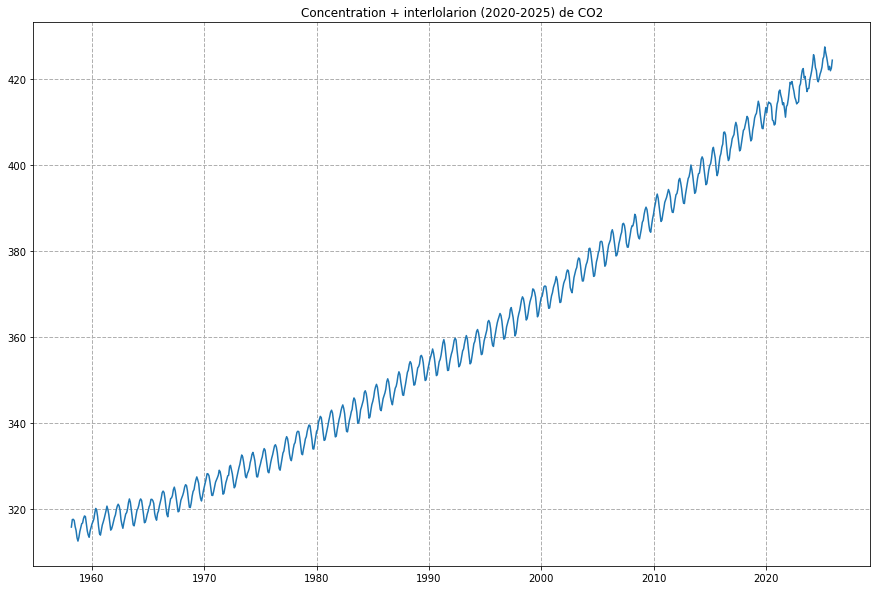

In [101]:
id =  list(dfb.index)
co22 = pd.Series(co2, index = dfb.index)   
dfb['co2'] = co2
dfb['co2'].plot(figsize=(15, 10),title = 'Concentration + interlolarion (2020-2025) de CO2').grid(linestyle='--', linewidth=1);

In [102]:
dfb

Date 1     Date 2  Mn    Yr   evolution  index     noise      s1  \
1958-03-01  21259.0  1958.2027   3  1958         NaN    2.0       NaN  315.70   
1958-04-01  21290.0  1958.2877   4  1958         NaN    3.0       NaN  317.45   
1958-05-01  21320.0  1958.3699   5  1958         NaN    4.0       NaN  317.51   
1958-06-01  21351.0  1958.4548   6  1958         NaN    5.0       NaN     NaN   
1958-07-01  21381.0  1958.5370   7  1958         NaN    6.0       NaN  315.86   
1958-08-01  21412.0  1958.6219   8  1958         NaN    7.0       NaN  314.93   
1958-09-01  21443.0  1958.7068   9  1958         NaN    8.0       NaN  313.21   
...             ...        ...  ..   ...         ...    ...       ...     ...   
2025-06-01      NaN  2025.4548   6  2025  424.823674    NaN -0.562960     NaN   
2025-07-01      NaN  2025.5370   7  2025  425.030380    NaN -0.697179     NaN   
2025-08-01      NaN  2025.6219   8  2025  425.244061    NaN -1.072044     NaN   
2025-09-01      NaN  2025.7068   9  2025  425.457929    NaN  0.557355     NaN   
2025-10-01      NaN  2025.7890  10  2025  425.665174    NaN -0.294414     NaN   
2025-11-01      NaN  2025.8740  11  2025  425.879664    NaN -0.295045     NaN   
2025-12-01      NaN  2025.9562  12  2025  426.087267    NaN  0.333937     NaN   

                s2      s3      s4      s5    s5_inter   s5_lent  s5_rapide  \
1958-03-01  314.44  316.19  314.91  315.70         NaN       NaN        NaN   
1958-04-01  315.16  317.30  314.99  317.45         NaN       NaN        NaN   
1958-05-01  314.71  317.86  315.06  317.51         NaN       NaN        NaN   
1958-06-01     NaN  317.24  315.14  317.24         NaN       NaN        NaN   
1958-07-01  315.19  315.86  315.22  315.86         NaN       NaN        NaN   
1958-08-01  316.19  314.00  315.29  314.93         NaN       NaN        NaN   
1958-09-01  316.08  312.46  315.35  313.21         NaN       NaN        NaN   
...            ...     ...     ...     ...         ...       ...        ...   
2025-06-01     NaN     NaN     NaN     NaN  425.104012 -0.623649  -1.466947   
2025-07-01     NaN     NaN     NaN     NaN  423.789113 -0.615896  -0.071808   
2025-08-01     NaN     NaN     NaN     NaN  422.177226 -0.607756   1.387035   
2025-09-01     NaN     NaN     NaN     NaN  422.953057 -0.599482   2.462746   
2025-10-01     NaN     NaN     NaN     NaN  421.923601 -0.591346   2.855813   
2025-11-01     NaN     NaN     NaN     NaN  422.520598 -0.582806   2.481215   
2025-12-01     NaN     NaN     NaN     NaN  424.385871 -0.574425   1.460907   

                s6         co2  
1958-03-01  314.44  315.700000  
1958-04-01  315.16  317.450000  
1958-05-01  314.71  317.510000  
1958-06-01  315.14  317.240000  
1958-07-01  315.19  315.860000  
1958-08-01  316.19  314.930000  
1958-09-01  316.08  313.210000  
...            ...         ...  
2025-06-01     NaN  425.104012  
2025-07-01     NaN  423.789113  
2025-08-01     NaN  422.177226  
2025-09-01     NaN  422.953057  
2025-10-01     NaN  421.923601  
2025-11-01     NaN  422.520598  
2025-12-01     NaN  424.385871  

[814 rows x 17 columns]

In [103]:
(dfb[dfb['Date 2'] > 2019]).head(15)

Date 1     Date 2  Mn    Yr   evolution  index     noise      s1  \
2019-01-01  43480.0  2019.0411   1  2019         NaN  732.0       NaN  410.92   
2019-02-01  43511.0  2019.1260   2  2019         NaN  733.0       NaN  411.66   
2019-03-01  43539.0  2019.2027   3  2019         NaN  734.0       NaN  412.00   
2019-04-01  43570.0  2019.2877   4  2019         NaN  735.0       NaN  413.52   
2019-05-01  43600.0  2019.3699   5  2019         NaN  736.0       NaN  414.83   
2019-06-01  43631.0  2019.4548   6  2019         NaN  737.0       NaN  413.96   
2019-07-01  43661.0  2019.5370   7  2019         NaN  738.0       NaN  411.85   
2019-08-01  43692.0  2019.6219   8  2019         NaN  739.0       NaN  410.08   
2019-09-01  43723.0  2019.7068   9  2019         NaN  740.0       NaN  408.55   
2019-10-01  43753.0  2019.7890  10  2019         NaN  741.0       NaN  408.43   
2019-11-01  43784.0  2019.8740  11  2019         NaN  742.0       NaN  410.28   
2019-12-01  43814.0  2019.9562  12  2019         NaN  743.0       NaN  411.85   
2020-01-01  43845.0  2020.0410   1  2020         NaN  744.0       NaN  413.37   
2020-02-01      NaN  2020.1257   2  2020  411.797771    NaN -0.233891     NaN   
2020-03-01      NaN  2020.2049   3  2020  411.985952    NaN  0.244393     NaN   

                s2      s3      s4      s5    s5_inter   s5_lent  s5_rapide  \
2019-01-01  410.87  410.29  410.23  410.92         NaN       NaN        NaN   
2019-02-01  410.90  411.24  410.47  411.66         NaN       NaN        NaN   
2019-03-01  410.45  412.25  410.68  412.00         NaN       NaN        NaN   
2019-04-01  410.72  413.73  410.91  413.52         NaN       NaN        NaN   
2019-05-01  411.42  414.54  411.13  414.83         NaN       NaN        NaN   
2019-06-01  411.38  413.91  411.35  413.96         NaN       NaN        NaN   
2019-07-01  411.03  412.36  411.57  411.85         NaN       NaN        NaN   
2019-08-01  411.62  410.23  411.81  410.08         NaN       NaN        NaN   
2019-09-01  412.06  408.52  412.05  408.55         NaN       NaN        NaN   
2019-10-01  412.07  408.67  412.29  408.43         NaN       NaN        NaN   
2019-11-01  412.56  410.29  412.54  410.28         NaN       NaN        NaN   
2019-12-01  412.78  411.88  412.79  411.85         NaN       NaN        NaN   
2020-01-01  413.33  413.11  413.05  413.37         NaN       NaN        NaN   
2020-02-01     NaN     NaN     NaN     NaN  412.155766 -0.796055  -1.387941   
2020-03-01     NaN     NaN     NaN     NaN  413.834302 -0.798681  -2.402639   

                s6         co2  
2019-01-01  410.87  410.920000  
2019-02-01  410.90  411.660000  
2019-03-01  410.45  412.000000  
2019-04-01  410.72  413.520000  
2019-05-01  411.42  414.830000  
2019-06-01  411.38  413.960000  
2019-07-01  411.03  411.850000  
2019-08-01  411.62  410.080000  
2019-09-01  412.06  408.550000  
2019-10-01  412.07  408.430000  
2019-11-01  412.56  410.280000  
2019-12-01  412.78  411.850000  
2020-01-01  413.33  413.370000  
2020-02-01     NaN  412.155766  
2020-03-01     NaN  413.834302